# Import des outils / jeu de données

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from column_names import quali_var, quanti_var, target, id_col
from exploratory_analysis import plot_correlation_matrix, plot_na_quanti

In [2]:
np.random.seed(0)
sns.set_theme()

In [3]:
df = pd.read_csv(
    "data/train.csv",
    index_col=id_col,
)

# Présentation

## Jeu de données

### Lecture des données

### Présentation des variables

In [4]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
id,,,,,,,,,,,,,,,,,,,,,
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [5]:
print(f"Il y a {df.shape[1]} variables et {df.shape[0]} individus.")

Il y a 22 variables et 101763 individus.


In [6]:
for c in df.columns:
    print(f'"{c}",')

"loc",
"v(g)",
"ev(g)",
"iv(g)",
"n",
"v",
"l",
"d",
"i",
"e",
"b",
"t",
"lOCode",
"lOComment",
"lOBlank",
"locCodeAndComment",
"uniq_Op",
"uniq_Opnd",
"total_Op",
"total_Opnd",
"branchCount",
"defects",


#### Variables

#### Conversion de type

In [10]:
df[quali_var] = (
    df[quali_var].astype(str).astype("category")
)  # todo: convertir uniquement les variables INT en category

In [7]:
X = df.copy()[quanti_var + quali_var]
y = df.copy()[target]

In [8]:
df[quanti_var].head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
id,,,,,,,,,,,,,,,,,,,,,
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0


In [13]:
df[quali_var].head()

""
id
0
1
2
3
4


In [14]:
df[target].head()

id
0    False
1    False
2    False
3     True
4    False
Name: defects, dtype: bool

# Découverte des données

## Analyse univariée

In [15]:
df.nunique()

loc                   378
v(g)                  106
ev(g)                  71
iv(g)                  84
n                     836
v                    4515
l                      55
d                    3360
i                    5171
e                    8729
b                     315
t                    8608
lOCode                298
lOComment              91
lOBlank                94
locCodeAndComment      29
uniq_Op                70
uniq_Opnd             176
total_Op              623
total_Opnd            485
branchCount           144
defects                 2
dtype: int64

In [16]:
df[quanti_var].describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,1.017630e+05,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,2.085359e+04,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,1.905714e+05,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,5.647300e+02,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,2.256230e+03,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,1.019324e+04,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,1.684662e+07,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


In [17]:
df[quali_var].describe()

ValueError: Cannot describe a DataFrame without columns

# Visualisation

## Variables quantitatives

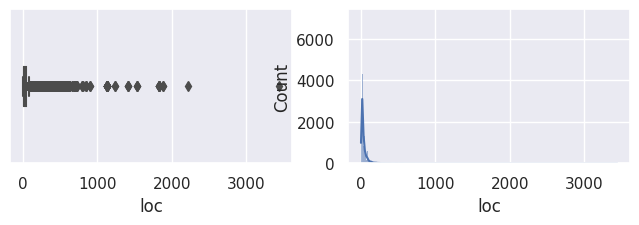

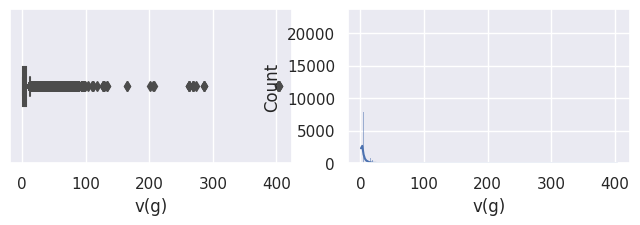

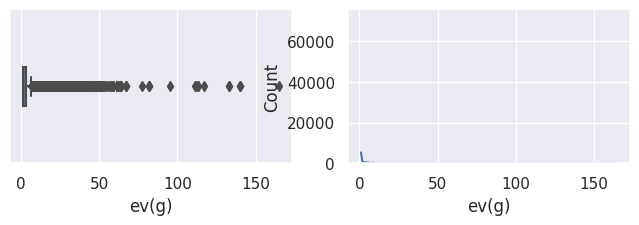

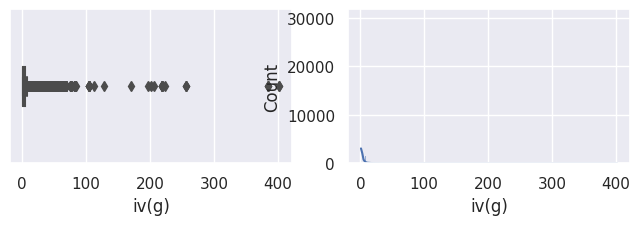

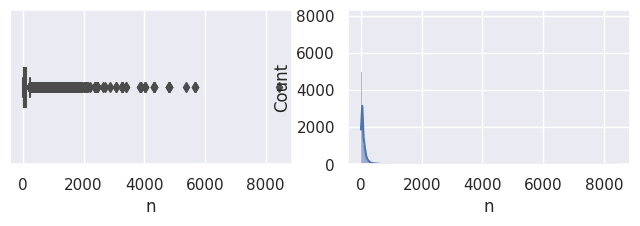

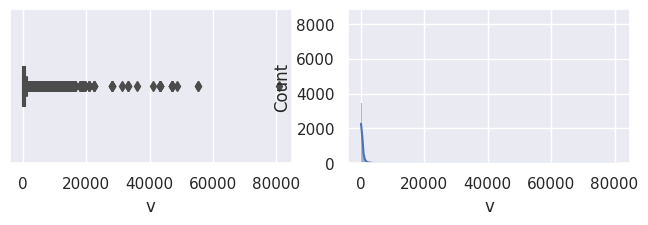

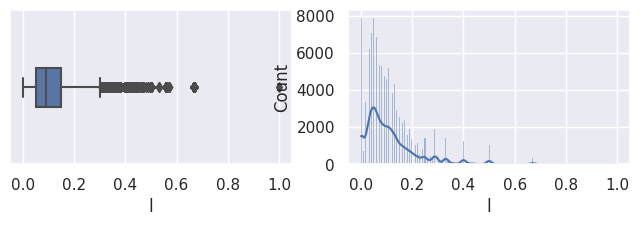

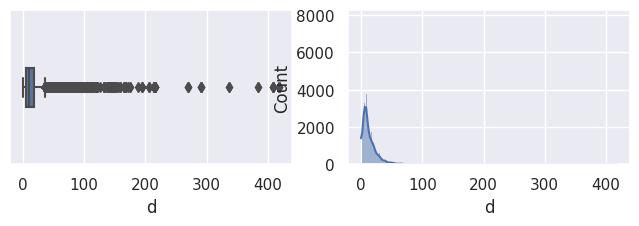

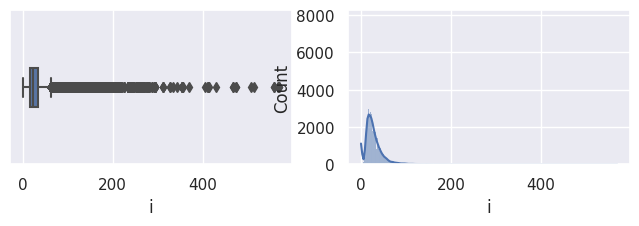

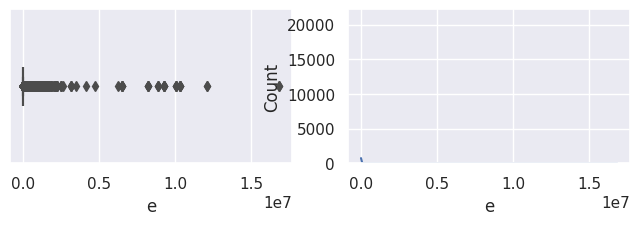

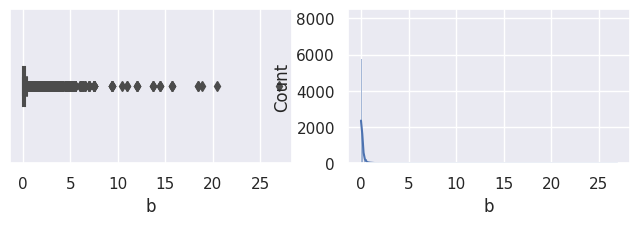

In [ ]:
for var in quanti_var:
    _, ax = plt.subplots(1, 2, figsize=(8, 2))
    sns.boxplot(x=df[var], width=0.25, ax=ax[0])
    sns.histplot(df[var], kde=True, ax=ax[1])
    plt.show()

/home/ab2/.cache/pypoetry/virtualenvs/kaggle-competitions-qudAJOav-py3.10/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


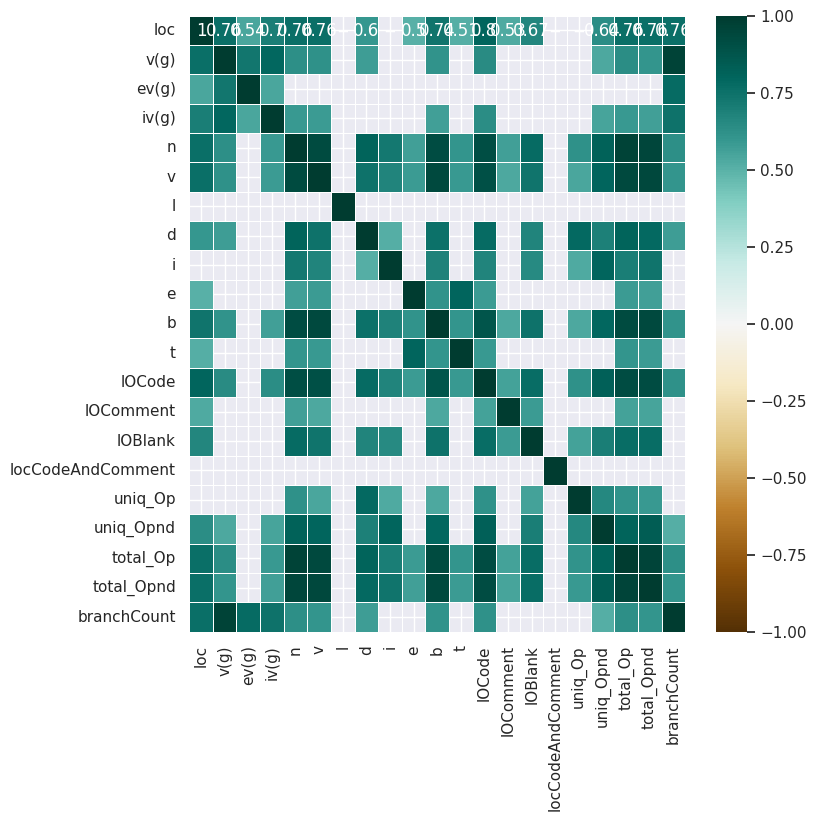

In [18]:
plot_correlation_matrix(df[quanti_var])

### Valeurs manquantes

In [7]:
plot_na_quanti(df[quanti_var])

There are no missing values.


## Variables qualitatives

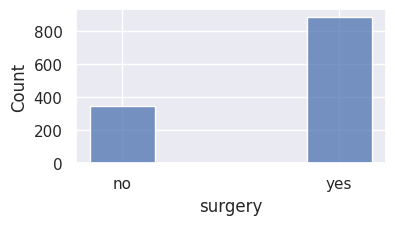

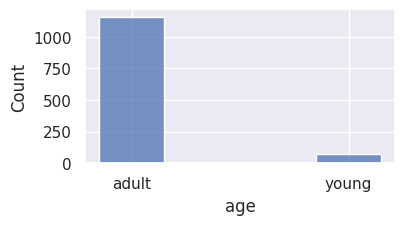

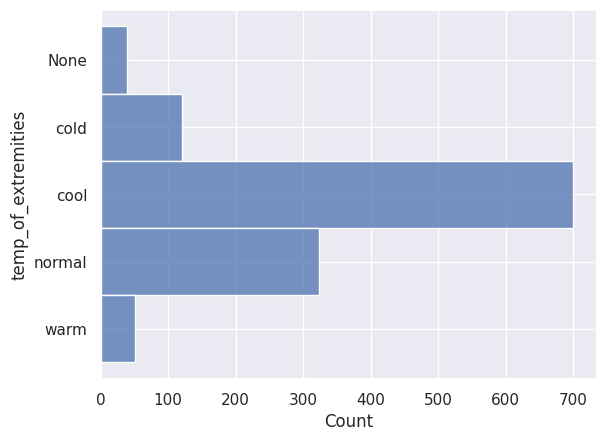

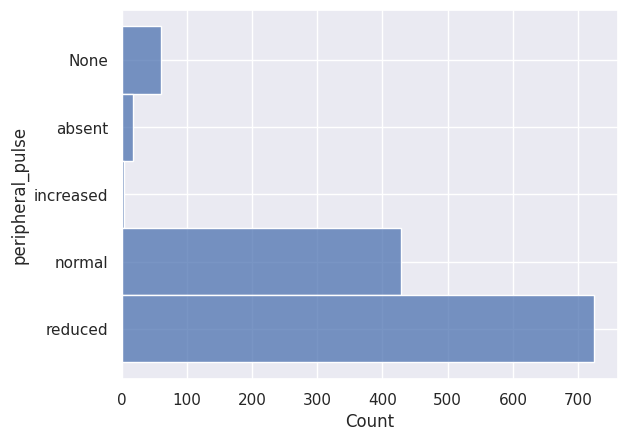

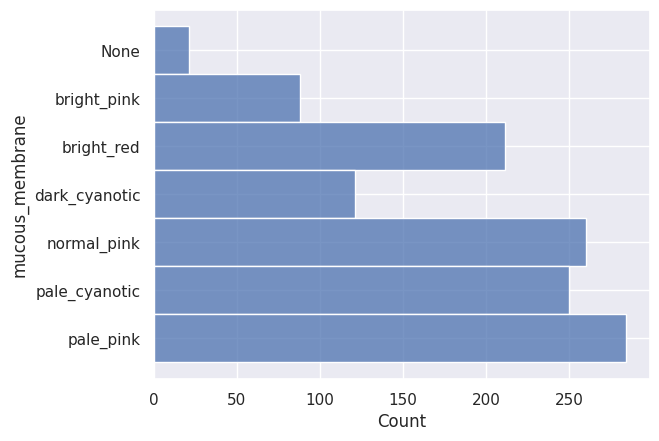

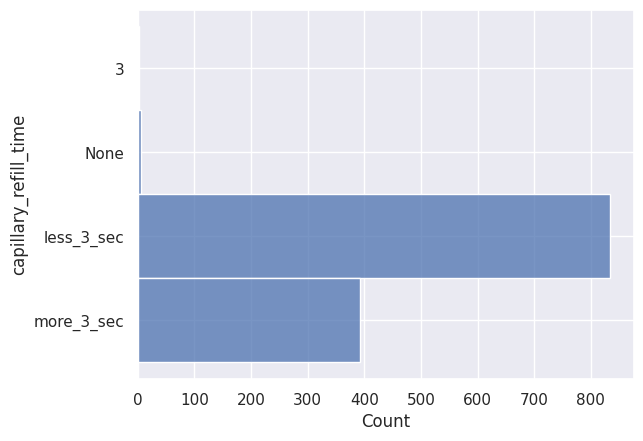

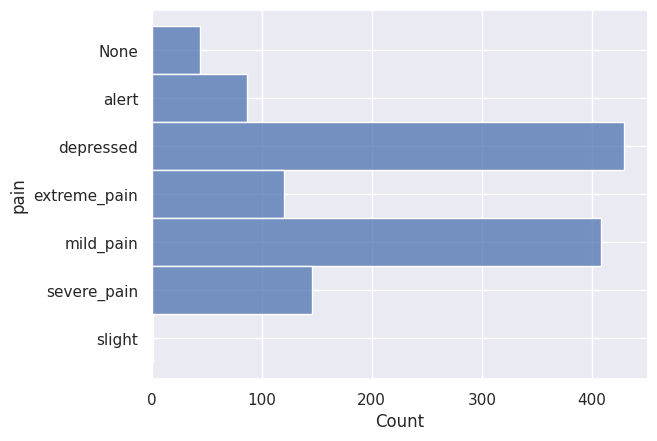

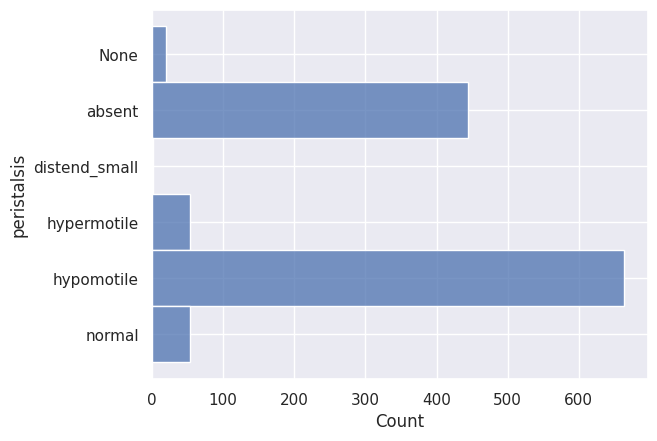

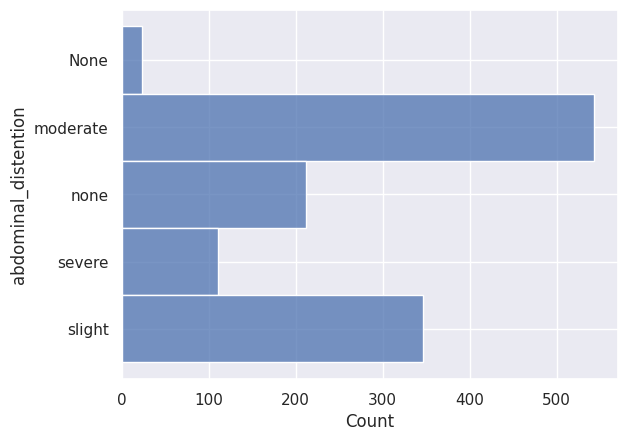

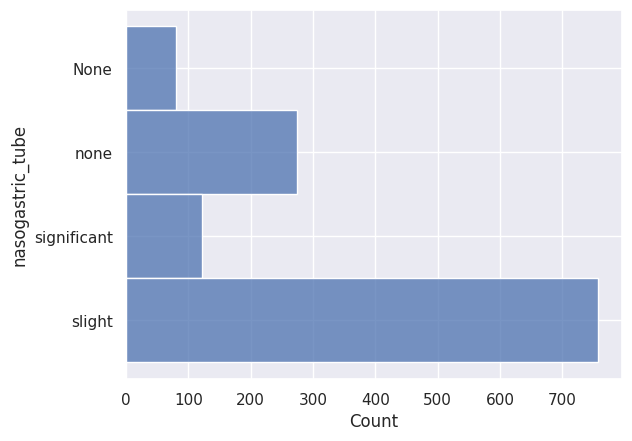

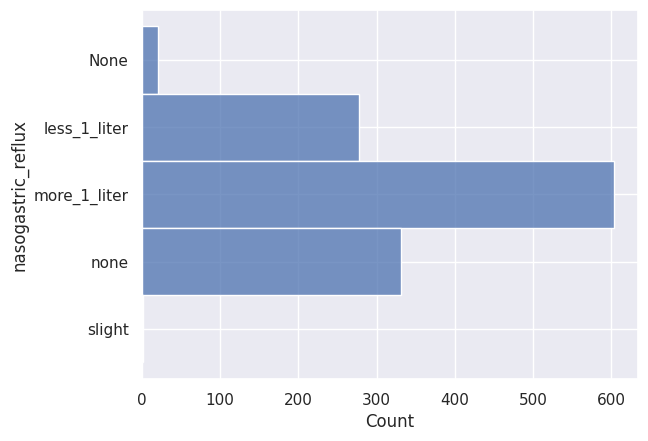

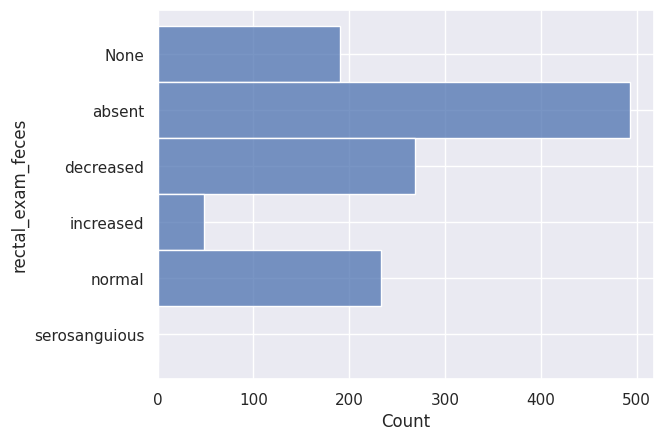

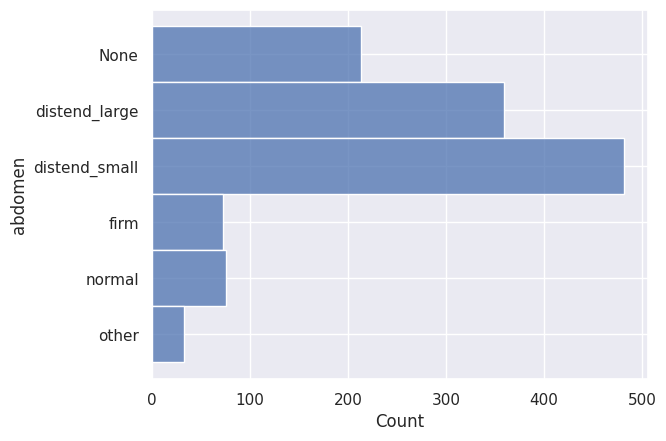

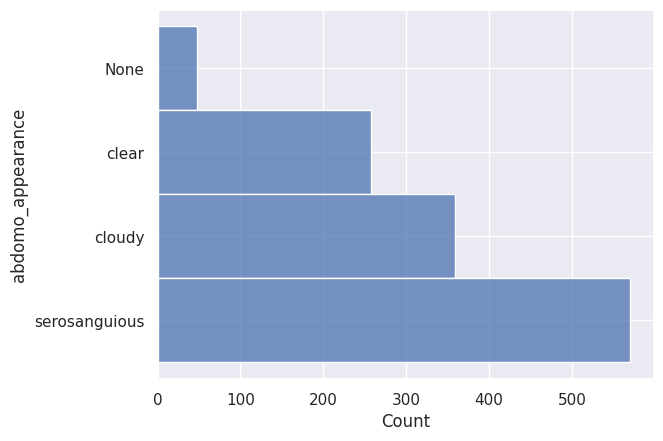

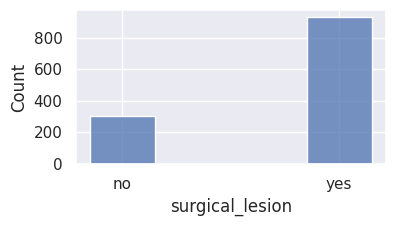

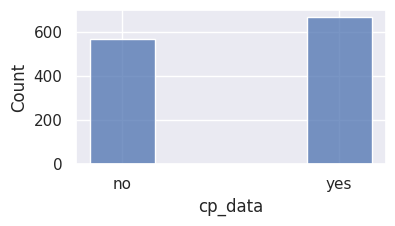

In [19]:
for var in quali_var:
    if df[var].nunique() > 3:
        sns.histplot(y=df[var])
    else:
        plt.figure(figsize=(4, 2))
        sns.histplot(df[var], shrink=0.3)
    plt.show()

### Valeurs manquantes

In [33]:
df_na = df[quali_var].isna()
df_na_sum = df_na.sum()

<Axes: title={'center': 'Valeurs manquantes'}, ylabel='id'>

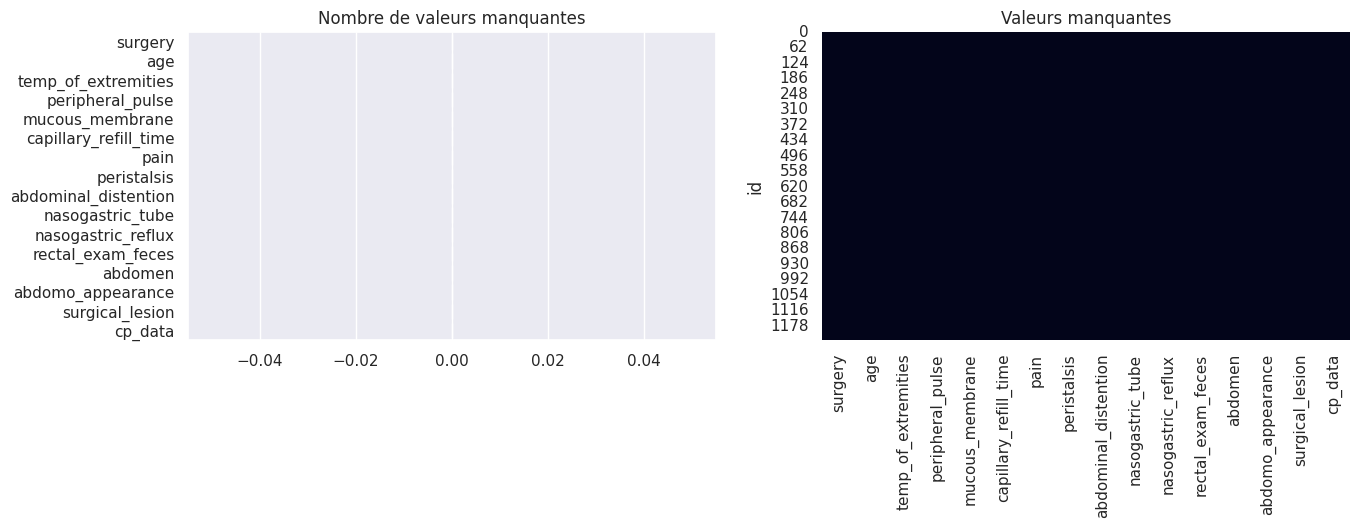

In [34]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title("Nombre de valeurs manquantes")
sns.barplot(x=df_na_sum.values, y=df_na_sum.index, color="C0", ax=ax[0])

ax[1].set_title("Valeurs manquantes")
sns.heatmap(df_na, cbar=False, ax=ax[1])

In [35]:
df_na_sum  # fixme: na are not detected because categories are converted as string I guess?

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
abdomo_appearance        0
surgical_lesion          0
cp_data                  0
dtype: int64

In [39]:
df.replace("none", "None", inplace=True)

### Variable cible

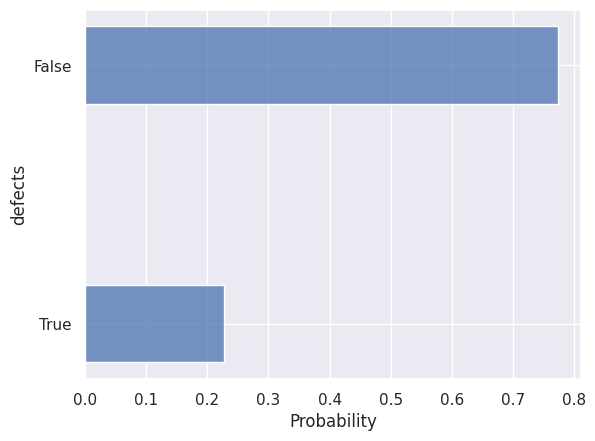

In [13]:
sns.histplot(y=y.astype(str), shrink=0.3, stat="probability")
plt.show()

In [14]:
pd.concat((y.value_counts(), y.value_counts(normalize=True)), axis=1)

,defects,defects
False,78699,0.773356
True,23064,0.226644


## Variable cible en fonction des autres variables

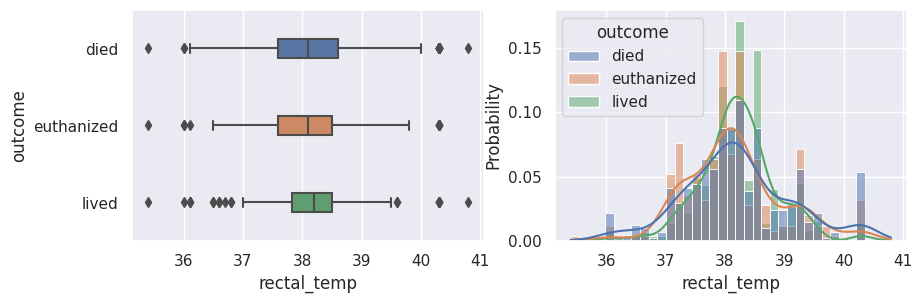

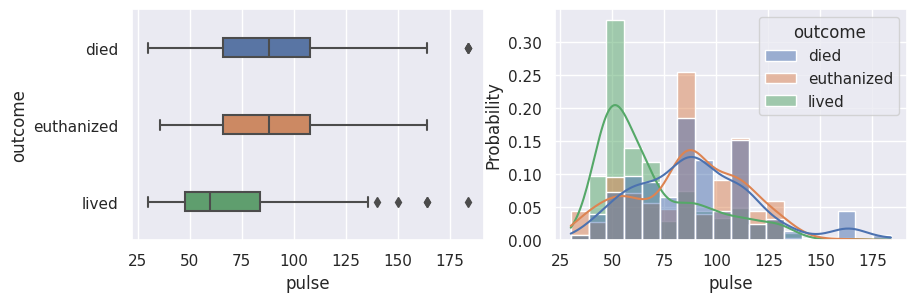

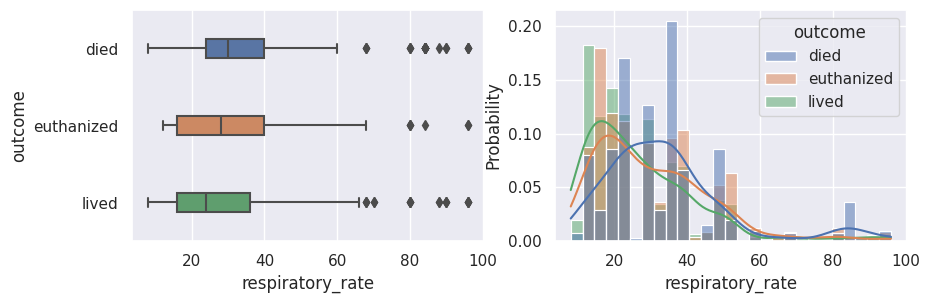

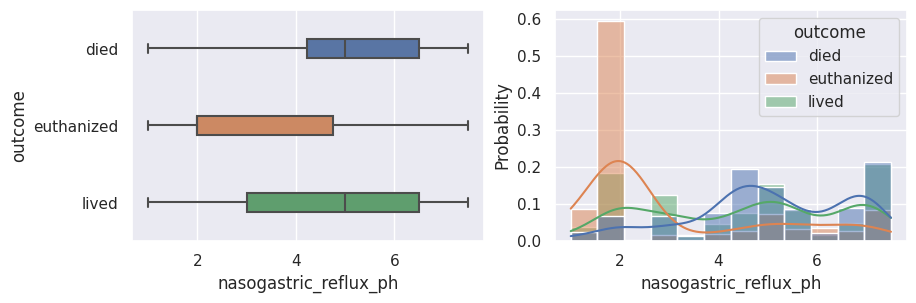

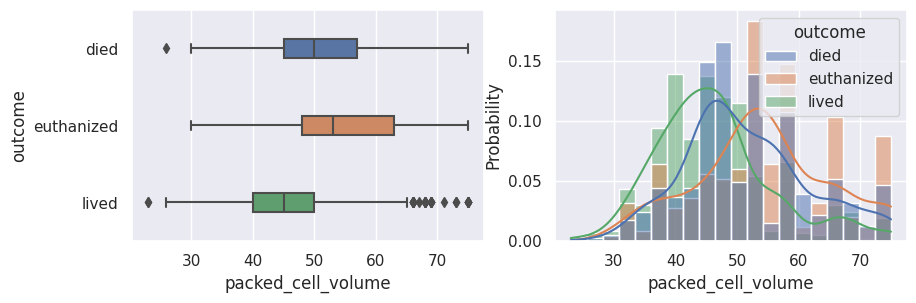

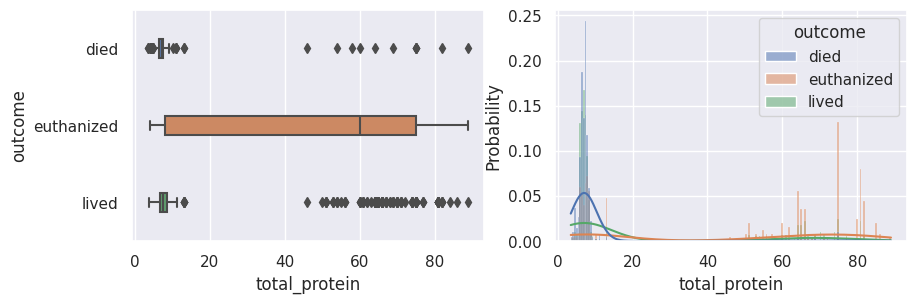

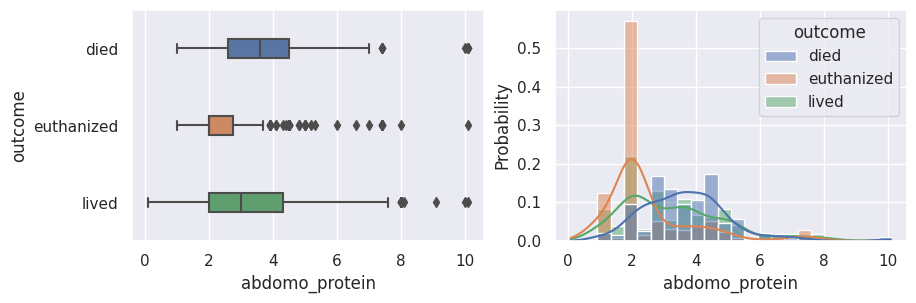

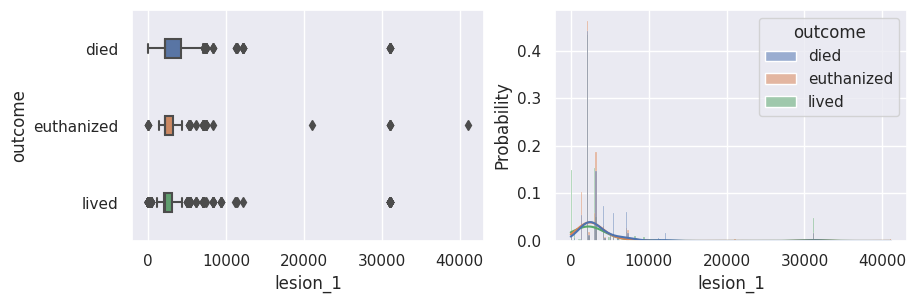

In [25]:
for var in quanti_var:
    _, ax = plt.subplots(1, 2, figsize=(10, 3))

    sns.boxplot(df, x=df[var], y=df[target], width=0.25, ax=ax[0])

    sns.histplot(
        df,
        x=df[var],
        kde=True,
        ax=ax[1],
        hue=df[target],
        stat="probability",
        common_norm=False,
    )

    plt.show()

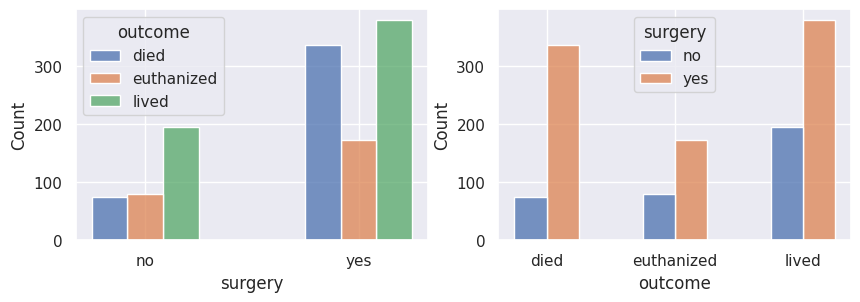

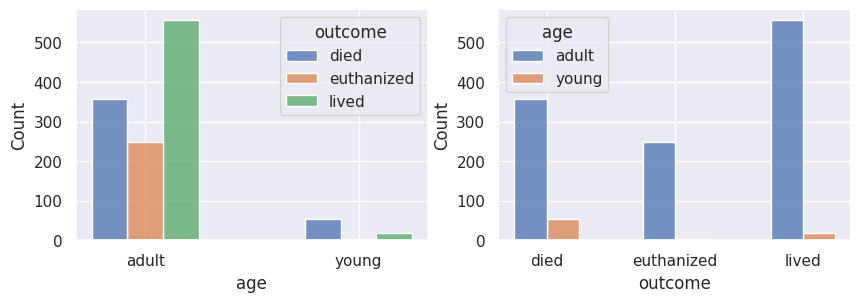

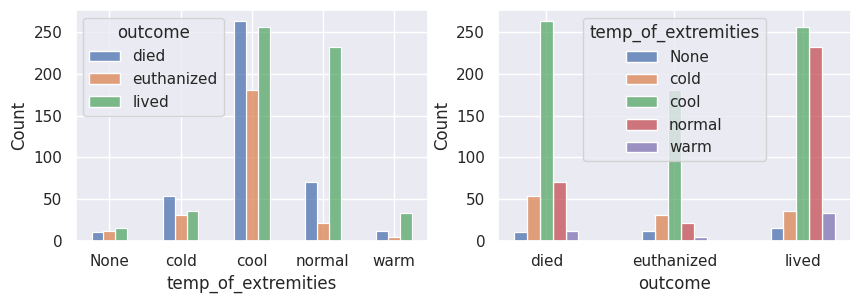

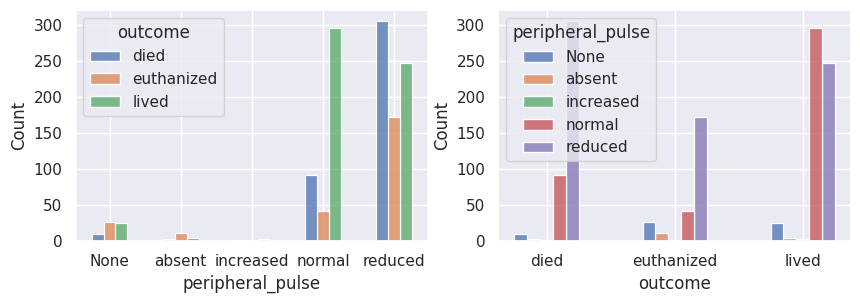

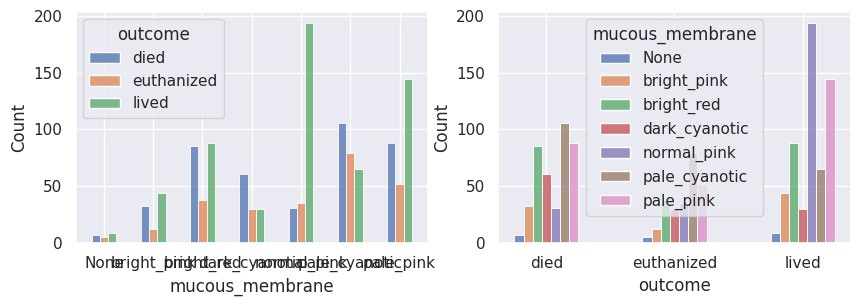

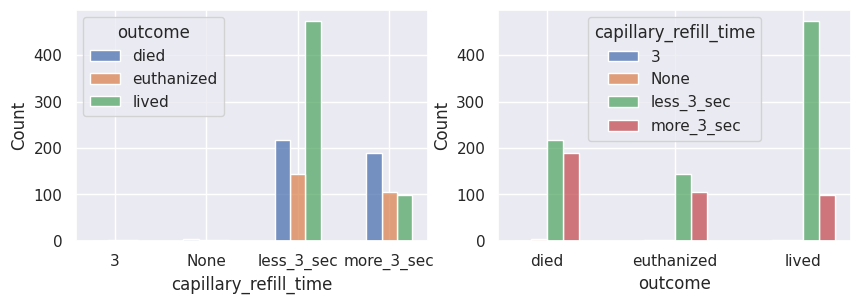

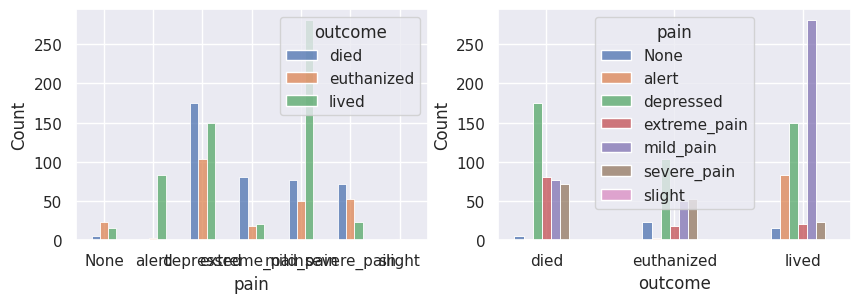

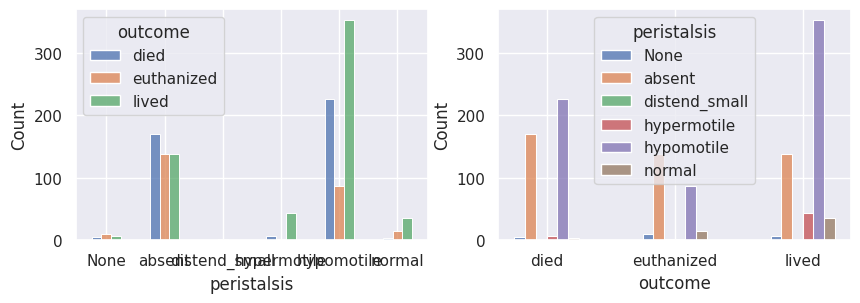

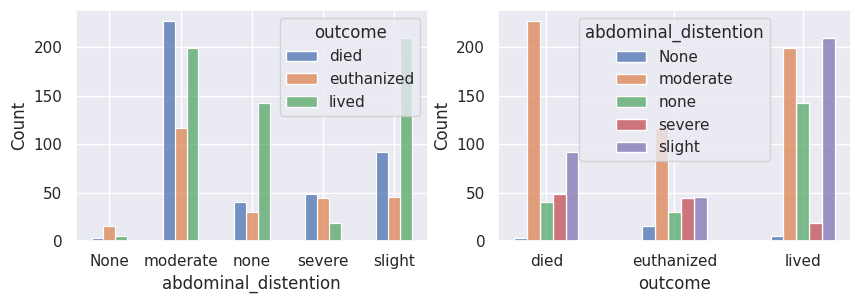

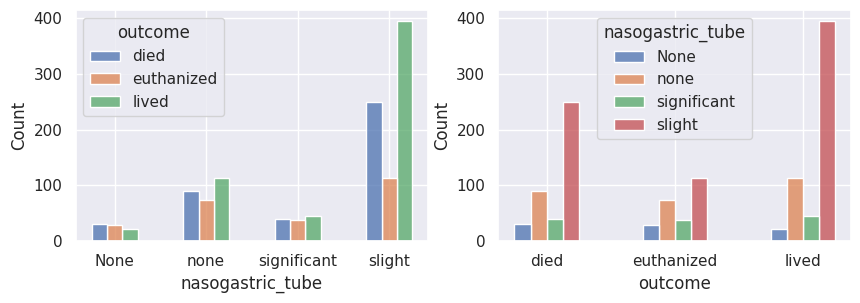

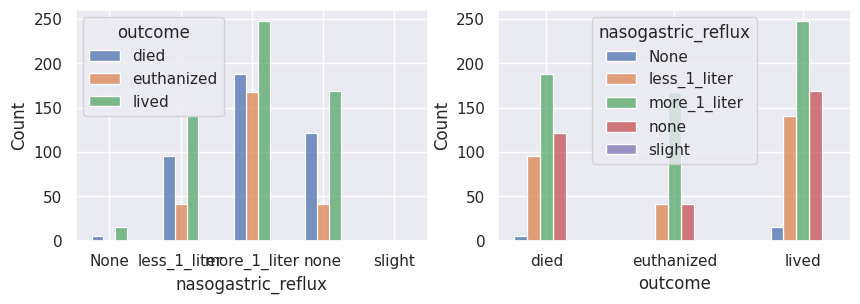

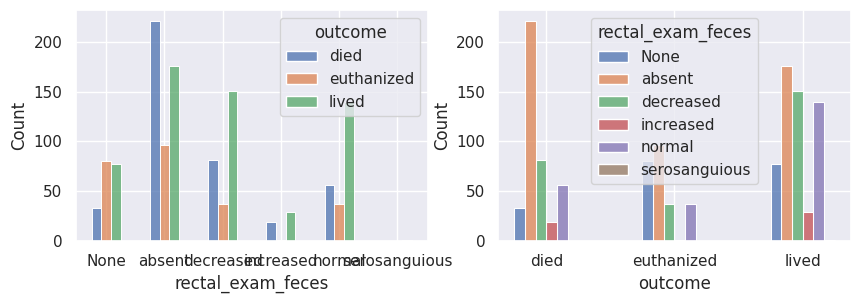

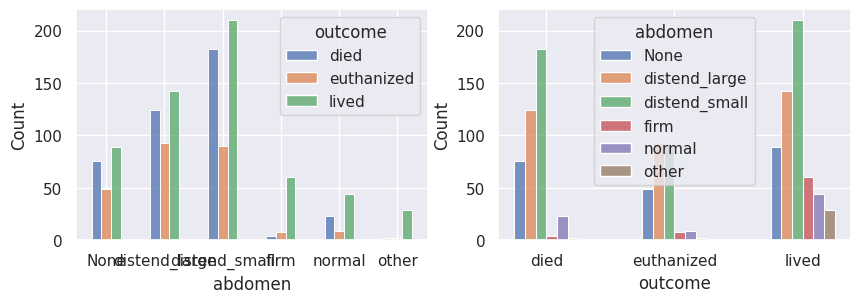

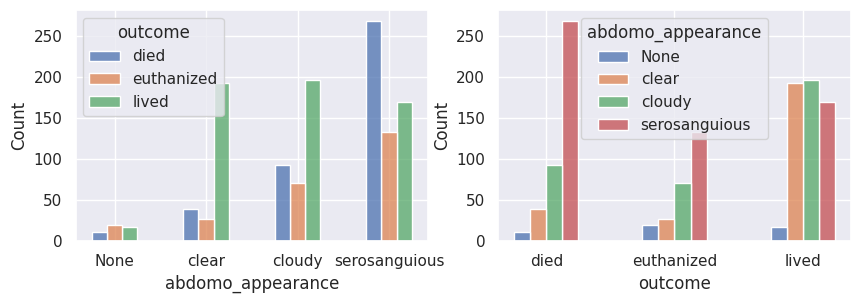

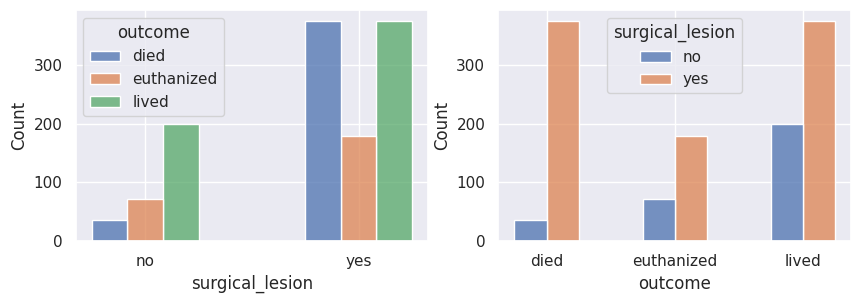

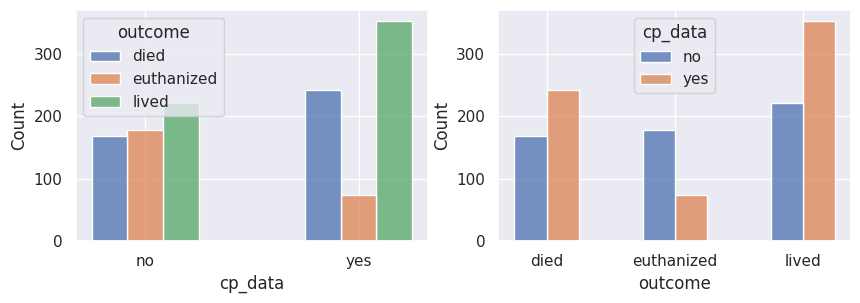

In [26]:
for var in quali_var:
    _, ax = plt.subplots(1, 2, figsize=(10, 3))

    sns.histplot(
        df,
        x=df[var],
        hue=df[target],
        multiple="dodge",
        shrink=0.5,
        ax=ax[0],
    )

    sns.histplot(
        df,
        hue=df[var],
        x=df[target],
        multiple="dodge",
        shrink=0.5,
        ax=ax[1],
    )

    plt.show()

# Sauvegarde du Dataframe

In [15]:
df.to_csv("data/data.csv")